## RNN

In [2]:
import tensorflow as tf
import numpy as np
import Utils.Evaluation

In [3]:
from Utils import Pickle

In [5]:
(X_melspec_train, X_melspec_test, X_melspec_valid, y_melspec_train, y_melspec_test, y_melspec_valid) = Pickle.load_pickle('data/out/pickle/mel_spec.pkl')
#(X_mfcc_train, X_mfcc_test, X_mfcc_valid, y_mfcc_train, y_mfcc_test, y_mfcc_valid) = Pickle.load_pickle('mfcc.pkl')
#(X_cqt_train, X_cqt_test, X_cqt_valid, y_cqt_train, y_cqt_test, y_cqt_valid) = Pickle.load_pickle('cqt.pkl')

Loading pickle file from data/out/pickle/mel_spec.pkl


In [6]:
X_train = np.array([spec.flatten() for spec in X_melspec_train])
X_test = np.array([spec.flatten() for spec in X_melspec_test])
X_valid = np.array([spec.flatten() for spec in X_melspec_valid])
X_train.shape, X_test.shape, X_valid.shape # shape = (samples, timesteps, features)

((171566, 400), (57200, 400), (57200, 400))

In [7]:
def split_in_sequences(data, length):
    out = np.zeros([int(np.ceil(data.shape[0]/length)),length,data.shape[1]])
    for i in range(int(np.floor(data.shape[0]/length))):
        out[i] = (data[i*length:(i+1)*length])
    #out[-1]=(data[int(np.floor(data.shape[0]/length))*length:]) # append last batch (possibly shorter than length)
    return out

In [8]:
Xtr = split_in_sequences(X_train, 20)
Xte = split_in_sequences(X_test, 20)
Xva = split_in_sequences(X_valid, 20)
ytr = split_in_sequences(y_melspec_train, 20)
yte = split_in_sequences(y_melspec_test, 20)
yva = split_in_sequences(y_melspec_valid, 20)
Xtr.shape, Xte.shape, Xva.shape, ytr.shape, yte.shape, yva.shape

((8579, 20, 400),
 (2860, 20, 400),
 (2860, 20, 400),
 (8579, 20, 88),
 (2860, 20, 88),
 (2860, 20, 88))

In [31]:
from Utils.Models import Model
import Utils.Models.LSTM
import importlib
importlib.reload(Train)
importlib.reload(Utils.Models.LSTM)

<module 'Utils.Models.LSTM_time_distributed' from 'C:\\development\\repos\\Uni\\dat550-2021\\DAT5502021\\Utils\\Models\\LSTM_time_distributed.py'>

In [32]:
Model.train(Xtr,
            ytr,
            Xte,
            yte,
            batch_size=40,
            model_type='LSTM_TD',
            shape=Xtr[0].shape,
            early_stop_after=8)

Epoch 1/200

Epoch 00001: val_loss improved from inf to 0.13181, saving model to models\LSTM_TD.h5
Epoch 2/200

Epoch 00002: val_loss improved from 0.13181 to 0.13055, saving model to models\LSTM_TD.h5
Epoch 3/200

Epoch 00003: val_loss improved from 0.13055 to 0.13016, saving model to models\LSTM_TD.h5
Epoch 4/200

Epoch 00004: val_loss improved from 0.13016 to 0.12986, saving model to models\LSTM_TD.h5
Epoch 5/200

Epoch 00005: val_loss improved from 0.12986 to 0.12895, saving model to models\LSTM_TD.h5
Epoch 6/200

Epoch 00006: val_loss improved from 0.12895 to 0.12480, saving model to models\LSTM_TD.h5
Epoch 7/200

Epoch 00007: val_loss improved from 0.12480 to 0.12426, saving model to models\LSTM_TD.h5
Epoch 8/200

Epoch 00008: val_loss improved from 0.12426 to 0.12229, saving model to models\LSTM_TD.h5
Epoch 9/200

Epoch 00009: val_loss improved from 0.12229 to 0.11750, saving model to models\LSTM_TD.h5
Epoch 10/200

Epoch 00010: val_loss improved from 0.11750 to 0.11654, saving 

In [33]:
model = tf.keras.models.load_model('models/LSTM_TD.h5')
old_model = tf.keras.models.load_model('models/LSTM_TimeDistr.h5')

In [34]:
pred = model(Xva)
old_pred = old_model(Xva)

In [35]:
Utils.Evaluation.get_confusion_matrix(pred, yva, threshold=0.3)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[4836695,  138202],
       [  34969,   23734]])>

In [36]:
Utils.Evaluation.get_confusion_matrix(old_pred, yva, threshold=0.3)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[4829800,  134929],
       [  41864,   27007]])>

Area under curve: 0.8821955145591586


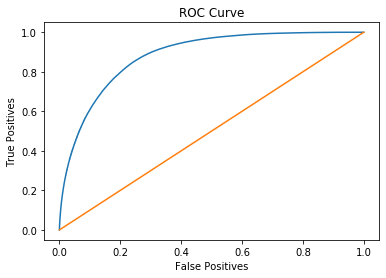

In [37]:
Utils.Evaluation.plot_roc_curve(pred, yva)

Area under curve: 0.8815350377366652


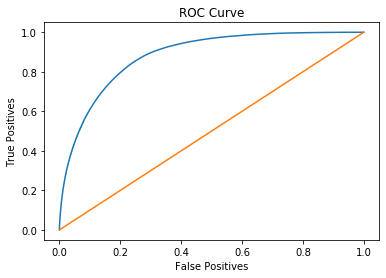

In [38]:
Utils.Evaluation.plot_roc_curve(old_pred, yva)

In [39]:
print("accuracy", Utils.Evaluation.get_metric(pred, yva, 'accuracy'))
print("precision", Utils.Evaluation.get_metric(pred, yva, 'precision'))
print("recall", Utils.Evaluation.get_metric(pred, yva, 'recall'))
print("f1", Utils.Evaluation.get_metric(pred, yva, 'F1'))

accuracy 0.9680501033057851
precision 0.5457685664939551
recall 0.04097915225768205
f1 0.07623423992647693


In [40]:
print("accuracy", Utils.Evaluation.get_metric(old_pred, yva, 'accuracy'))
print("precision", Utils.Evaluation.get_metric(old_pred, yva, 'precision'))
print("recall", Utils.Evaluation.get_metric(old_pred, yva, 'recall'))
print("f1", Utils.Evaluation.get_metric(old_pred, yva, 'F1'))

accuracy 0.9680814923712651
precision 0.5465056714233443
recall 0.046116984487698846
f1 0.08505646323198615
